In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

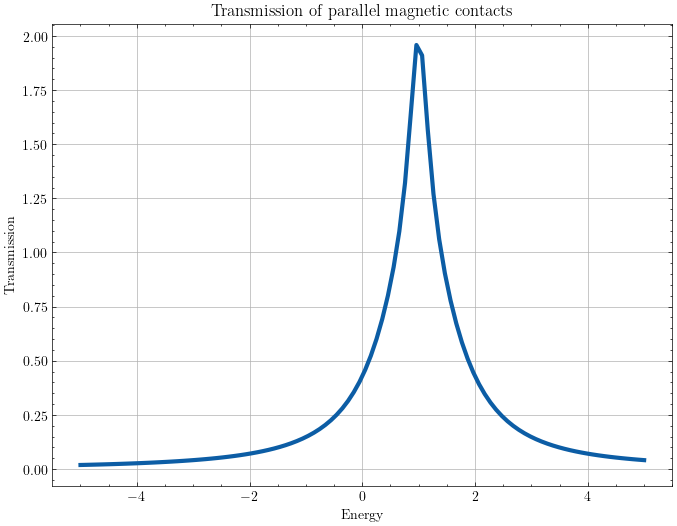

In [2]:
epsilon=1
N=2

def Hamiltonian(epsilon,N):
    arr=epsilon*np.ones(N)
    return np.diag(arr)

def self_energy(gamma_u,gamma_d):
    return -1j/2*np.array([[gamma_u,0],[0,gamma_d]])

def greens_function(E,epsilon,N,gamma_u,gamma_d):
    sigma1=self_energy(gamma_u,gamma_d)
    sigma2=self_energy(gamma_u,gamma_d)

    return np.linalg.inv((E-epsilon)*np.eye(N)-sigma1-sigma2)

E=np.linspace(-5,5,100)
trans_vals1=[]
def transmission(E,epsilon,N,gamma_u,gamma_d):
    sigma1=self_energy(gamma_u,gamma_d)
    sigma2=self_energy(gamma_u,gamma_d)

    gamma1=1j*(sigma1-sigma1.conj().T)
    gamma2=1j*(sigma2-sigma2.conj().T)

    GR=greens_function(E,epsilon,N,gamma_u,gamma_d)
    GA=GR.conj().T

    trans=np.trace(gamma1 @ GR  @  gamma2   @  GA)
    return trans

for energies in E:
    t=transmission(energies,epsilon,N,0.8,0.2)
    trans_vals1.append(t)

plt.style.use('science')
plt.figure(figsize=(8,6))
plt.plot(E, np.real(trans_vals1),lw='3')
plt.title('Transmission of parallel magnetic contacts')
plt.xlabel('Energy')
plt.ylabel('Transmission')
plt.grid(True)
plt.show()


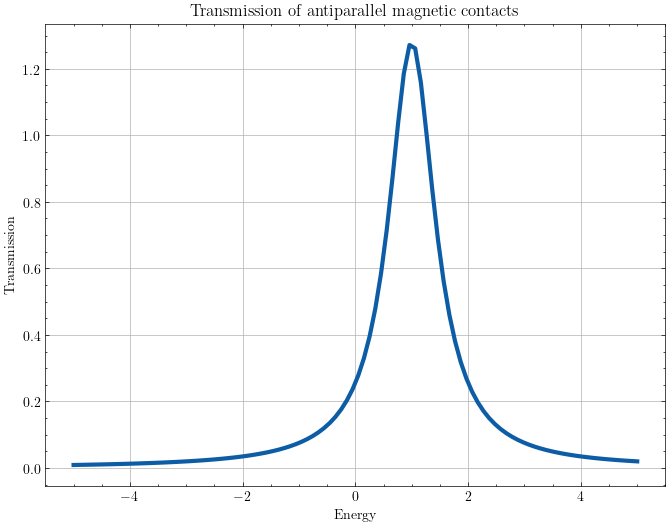

In [3]:
epsilon=1
N=2

def Hamiltonian(epsilon,N):
    arr=epsilon*np.ones(N)
    return np.diag(arr)

def self_energy(gamma_u,gamma_d):
    return -1j/2*np.array([[gamma_u,0],[0,gamma_d]])

def greens_function(E,epsilon,N,gamma_u,gamma_d):
    sigma1=self_energy(gamma_u,gamma_d)
    sigma2=self_energy(gamma_d,gamma_u)

    return np.linalg.inv((E-epsilon)*np.eye(N)-sigma1-sigma2)

E=np.linspace(-5,5,100)
trans_vals2=[]
def transmission(E,epsilon,N,gamma_u,gamma_d):
    sigma1=self_energy(gamma_u,gamma_d)
    sigma2=self_energy(gamma_d,gamma_u)

    gamma1=1j*(sigma1-sigma1.conj().T)
    gamma2=1j*(sigma2-sigma2.conj().T)

    GR=greens_function(E,epsilon,N,gamma_u,gamma_d)
    GA=GR.conj().T

    trans=np.trace(gamma1 @ GR  @  gamma2   @  GA)
    return trans

for energies in E:
    t=transmission(energies,epsilon,N,0.8,0.2)
    trans_vals2.append(t)

plt.figure(figsize=(8,6))
plt.plot(E, np.real(trans_vals2),lw='3')
plt.title('Transmission of antiparallel magnetic contacts')
plt.xlabel('Energy')
plt.ylabel('Transmission')
plt.grid(True)
plt.show()

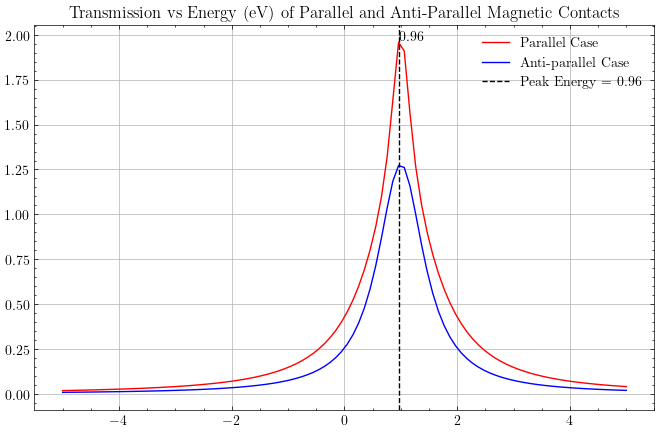

In [ ]:
# Find the index of the maximum transmission
max_idx = np.argmax(np.real(trans_vals1))
peak_energy = E[max_idx]
peak_trans = np.real(trans_vals1)[max_idx]

plt.figure(figsize=(8,5))
plt.plot(E, np.real(trans_vals1),'r-',label='Parallel Case')
plt.plot(E, np.real(trans_vals2),'b-',label='Anti-parallel Case')
# Draw vertical line at peak
plt.axvline(x=peak_energy, color='k', linestyle='--', label=f'Peak Energy = {peak_energy:.2f}')
# Annotate the peak energy value
plt.text(peak_energy, peak_trans, f'  {peak_energy:.2f}', color='k', va='bottom')
plt.title('Transmission vs Energy (eV) of Parallel and Anti-Parallel Magnetic Contacts')
plt.legend()
plt.grid()
plt.show()

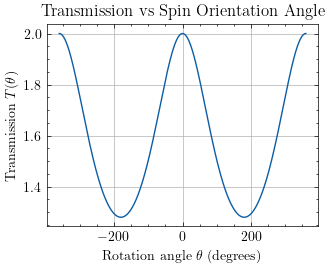

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# === Spin parameters ===
alpha = 0.8  # spin-up coupling
beta  = 0.2 # spin-down coupling
epsilon = 0.5  # energy level in channel
E = 0.5       # evaluation energy = resonance
theta_vals = np.linspace(-2*np.pi, 2*np.pi, 1200)  # 0 to 180 degrees

# Pauli matrices
I = np.eye(2)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

def Gamma_rotated(theta, phi=0):
    """Broadening matrix for rotated contact"""
    n = np.array([
        np.sin(theta)*np.cos(phi),
        np.sin(theta)*np.sin(phi),
        np.cos(theta)
    ])
    sigma_dot_n = n[0]*sigma_x + n[1]*sigma_y + n[2]*sigma_z
    return 0.5*(alpha + beta)*I + 0.5*(alpha - beta)*sigma_dot_n

def G_retarded(E, epsilon, GammaL, GammaR):
    """Green's function for single site with 2x2 spin"""
    Ginv = (E - epsilon)*I + 0.5j*(GammaL + GammaR)
    return np.linalg.inv(Ginv)

def transmission(G, GammaL, GammaR):
    """NEGF transmission formula"""
    return np.real(np.trace(GammaL @ G @ GammaR @ G.conj().T))

# Fixed left contact
GammaL = np.diag([alpha, beta])

# Sweep theta for right contact
T_vals = []
for theta in theta_vals:
    GammaR = Gamma_rotated(theta)
    G = G_retarded(E, epsilon, GammaL, GammaR)
    T_vals.append(transmission(G, GammaL, GammaR))

# Plot
plt.plot(np.degrees(theta_vals), T_vals)
plt.xlabel(r"Rotation angle $\theta$ (degrees)")
plt.ylabel(r'Transmission $T(\theta)$')
plt.title("Transmission vs Spin Orientation Angle")
plt.grid(True)
plt.show()
